In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.sample(6)

,cgpa,placement_exam_marks,placed
79,7.63,19.0,1
98,8.12,76.0,0
405,6.60,32.0,1
687,6.81,23.0,0
411,6.04,66.0,0
413,6.65,28.0,1


In [4]:
df.shape

(1000, 3)

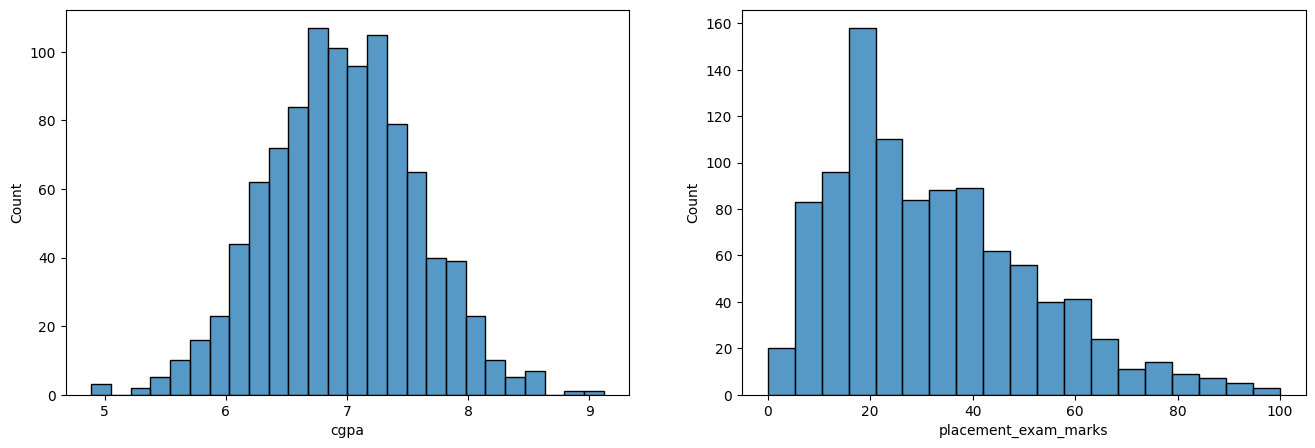

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

## 'placement' column has skewed distribution, IQR is applied on that column

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

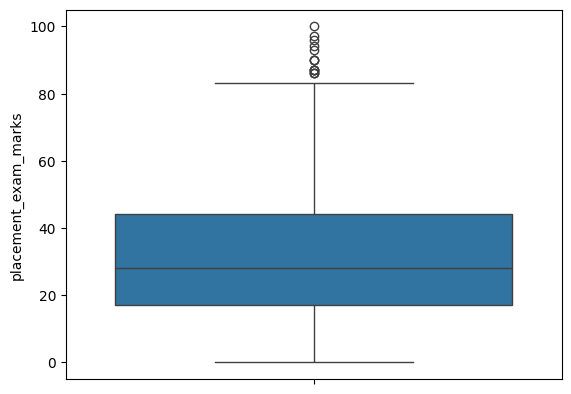

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
#finding IQR 
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [10]:
percentile75

44.0

In [11]:
IQR=percentile75-percentile25

In [13]:
upper_limit=percentile75 + 1.5 * IQR
lower_limit=percentile25-1.5 * IQR

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 84.5
Lower Limit: -23.5


## Finding Outliers

In [15]:
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
#Trimming

new_df=df[df['placement_exam_marks']< upper_limit]
new_df



,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [21]:
# Capping

new_df_cap=np.where(df['placement_exam_marks'] > upper_limit, upper_limit, np.where(df['placement_exam_marks']<lower_limit, lower_limit, df['placement_exam_marks']))

In [22]:
new_df_cap.shape

(1000,)